<a href="https://colab.research.google.com/github/frozenparadox99/Fudan_Ped_Predictions/blob/main/Fudan_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np
import pandas as pd

In [2]:
%%shell

# download the Penn-Fudan dataset
wget https://www.cis.upenn.edu/~jshi/ped_html/PennFudanPed.zip .
# extract it in the current folder
unzip PennFudanPed.zip

--2023-04-13 06:24:11--  https://www.cis.upenn.edu/~jshi/ped_html/PennFudanPed.zip
Resolving www.cis.upenn.edu (www.cis.upenn.edu)... 158.130.69.163, 2607:f470:8:64:5ea5::d
Connecting to www.cis.upenn.edu (www.cis.upenn.edu)|158.130.69.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53723336 (51M) [application/zip]
Saving to: ‘PennFudanPed.zip’

PennFudanPed.zip    100%[===================>]  51.23M  29.2MB/s    in 1.8s    

2023-04-13 06:24:13 (29.2 MB/s) - ‘PennFudanPed.zip’ saved [53723336/53723336]

--2023-04-13 06:24:13--  http://./
Resolving . (.)... failed: No address associated with hostname.
wget: unable to resolve host address ‘.’
FINISHED --2023-04-13 06:24:13--
Total wall clock time: 2.1s
Downloaded: 1 files, 51M in 1.8s (29.2 MB/s)
Archive:  PennFudanPed.zip
   creating: PennFudanPed/
  inflating: PennFudanPed/added-object-list.txt  
   creating: PennFudanPed/Annotation/
  inflating: PennFudanPed/Annotation/FudanPed00001.txt  
  inflating: Pen

In [3]:
os.chdir('/content/PennFudanPed/PNGImages')
lst_org   = os.listdir('/content/PennFudanPed/PNGImages')
print(lst_org)

['PennPed00076.png', 'FudanPed00028.png', 'PennPed00081.png', 'PennPed00065.png', 'PennPed00053.png', 'FudanPed00010.png', 'FudanPed00062.png', 'PennPed00014.png', 'FudanPed00051.png', 'FudanPed00047.png', 'FudanPed00052.png', 'FudanPed00009.png', 'FudanPed00014.png', 'FudanPed00025.png', 'PennPed00095.png', 'PennPed00047.png', 'FudanPed00072.png', 'PennPed00013.png', 'PennPed00017.png', 'FudanPed00048.png', 'PennPed00082.png', 'PennPed00015.png', 'PennPed00040.png', 'FudanPed00046.png', 'FudanPed00064.png', 'FudanPed00065.png', 'PennPed00059.png', 'FudanPed00043.png', 'PennPed00002.png', 'PennPed00049.png', 'PennPed00092.png', 'PennPed00020.png', 'FudanPed00056.png', 'PennPed00072.png', 'PennPed00093.png', 'FudanPed00024.png', 'PennPed00091.png', 'PennPed00022.png', 'PennPed00078.png', 'FudanPed00016.png', 'FudanPed00066.png', 'FudanPed00027.png', 'PennPed00052.png', 'PennPed00089.png', 'FudanPed00015.png', 'PennPed00064.png', 'FudanPed00040.png', 'FudanPed00059.png', 'FudanPed00057.p

In [4]:
os.chdir('/content/PennFudanPed/PedMasks')
lst_mask   = os.listdir('/content/PennFudanPed/PedMasks')
print(lst_mask)

['PennPed00091_mask.png', 'FudanPed00030_mask.png', 'FudanPed00002_mask.png', 'FudanPed00001_mask.png', 'PennPed00058_mask.png', 'PennPed00009_mask.png', 'FudanPed00056_mask.png', 'FudanPed00021_mask.png', 'PennPed00028_mask.png', 'FudanPed00045_mask.png', 'FudanPed00072_mask.png', 'PennPed00081_mask.png', 'PennPed00047_mask.png', 'FudanPed00061_mask.png', 'FudanPed00012_mask.png', 'PennPed00034_mask.png', 'PennPed00042_mask.png', 'PennPed00025_mask.png', 'FudanPed00032_mask.png', 'FudanPed00023_mask.png', 'PennPed00053_mask.png', 'PennPed00077_mask.png', 'PennPed00041_mask.png', 'PennPed00031_mask.png', 'FudanPed00024_mask.png', 'FudanPed00044_mask.png', 'FudanPed00070_mask.png', 'FudanPed00069_mask.png', 'PennPed00062_mask.png', 'PennPed00073_mask.png', 'PennPed00066_mask.png', 'PennPed00072_mask.png', 'FudanPed00015_mask.png', 'PennPed00016_mask.png', 'FudanPed00010_mask.png', 'PennPed00076_mask.png', 'FudanPed00011_mask.png', 'PennPed00084_mask.png', 'PennPed00032_mask.png', 'Fudan

In [5]:
mask = []
img = []
for filename in lst_org:
   img.append(filename)
   
for filename in lst_mask:
   mask.append(filename)
img.sort()
mask.sort()

In [6]:
y = np.zeros((170, 28,28), dtype=np.float32)
X = np.zeros((170,224, 224, 1), dtype=np.float32)

In [7]:
for file in img:
  n = img.index(file)
  dir_img = os.path.join('/content/PennFudanPed/PNGImages', file)
  img_in_use = Image.open(dir_img)
  img_in_use = img_in_use.resize((224, 224))
  img_in_use = np.reshape(img_in_use.convert('L'), (224,224,1))
  X[n] = img_in_use

  mask_in_use = mask[n]
  dir_mask = os.path.join('/content/PennFudanPed/PedMasks', mask_in_use)
  mask_img = cv2.imread(dir_mask)
  mask_img = (mask_img!=0)*255.0
  mask_img = cv2.resize(mask_img, (28, 28))
  mask_img = 1.0*(mask_img[:,:,0])
  y[n] = mask_img

In [8]:
!pip install git+https://github.com/qubvel/segmentation_models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-vmmvyyz1
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/segmentation_models /tmp/pip-req-build-vmmvyyz1
  Resolved https://github.com/qubvel/segmentation_models to commit e951c6747f75fa9e7240816d1c79dd2e66813123
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 5.3 MB/s eta 0:00:00
  Created wheel for segmentation-models: filename=segmentation_models-1.0.1-py3-none-any.whl size=33806 sha256=cf0b4afc90f24f9ad88fc5658ff9049a75c694734fa8b3f66fc9ecbf26ad804e
  Stored in directory: /tmp/pip-ephem-wheel-cache-hp6txhi7/wheels/7e/e5/3d/85e32947c53e03f210361da47652f05b6f4e1c3e58f20e0ae3
Successfully built segmentation-models


In [11]:
from segmentation_models import Unet
from segmentation_models import get_preprocessing
from segmentation_models.losses import bce_jaccard_loss
from segmentation_models.metrics import iou_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
from keras.models import model_from_json

from keras.layers import Input, Conv2D, Reshape
from keras.models import Model

Segmentation Models: using `tf.keras` framework.


In [10]:
!pip install -U -q segmentation-models
!pip install -q tensorflow==2.2.1
!pip install -q keras==2.5
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

ERROR: Could not find a version that satisfies the requirement tensorflow==2.2.1 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0)
ERROR: No matching distribution found for tensorflow==2.2.1
ERROR: Could not find a version that satisfies the requirement keras==2.5 (from versions: 0.2.0, 0.3.0, 0.3.1, 0.3.2, 0.3.3, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.0.6, 1.0.7, 1.0.8, 1.1.0, 1.1.1, 1.1.2, 1.2.0, 1.2.1, 1.2.2, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.0.5, 2.0.6, 2.0.7, 2.0.8, 2.0.9, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.1.5, 2.1.6, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.2.4, 2.2.5, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.5

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
BACKBONE = 'resnet34'
preprocess_input = get_preprocessing(BACKBONE)
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

In [13]:
from keras.layers import Reshape
from keras.layers import BatchNormalization
N = X_train.shape[-1]

base_model = Unet(backbone_name='resnet34', encoder_weights='imagenet')

input_base_model = Input(shape=(224, 224, N))

l1 = Conv2D(3, (1, 1))(input_base_model)

out = base_model(l1)

x1 = Conv2D(10, kernel_size =3,strides=2,padding = "same", activation="relu")(out)
x1 = BatchNormalization()(x1)

x2= Conv2D(10, kernel_size=3,strides=2,padding = "same", activation="relu")(x1)
x2 = BatchNormalization()(x2)

x3 = Conv2D(10, kernel_size=3,strides=2,padding = "same", activation="relu")(x2)
x3 = BatchNormalization()(x3)

x4 = Conv2D(1, kernel_size=1,strides=1,padding = "same", activation="relu")(x3)

x_out = Reshape((28,28))(x4)

model = Model(input_base_model, x_out, name=base_model.name)

85521592/85521592 [==============================] - 1s 0us/step


In [14]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tf.keras.backend.epsilon())

def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tf.math.log(dice_coefficient(y_true, y_pred) + tf.keras.backend.epsilon())

model.compile(optimizer='sgd', loss=loss, metrics=[dice_coefficient])

model.fit(X_train,y_train,batch_size=32,epochs=10,validation_data=(X_test, y_test))

Epoch 1/10
5/5 [==============================] - 189s 35s/step - loss: 4.9562 - dice_coefficient: 0.3577 - val_loss: 12.6148 - val_dice_coefficient: 2.3440e-04
Epoch 2/10
5/5 [==============================] - 183s 36s/step - loss: 4.4190 - dice_coefficient: 0.3609 - val_loss: 1.9650 - val_dice_coefficient: 0.2319
Epoch 3/10
5/5 [==============================] - 173s 33s/step - loss: 4.6058 - dice_coefficient: 0.3530 - val_loss: 10.2304 - val_dice_coefficient: 0.0015
Epoch 4/10
5/5 [==============================] - 173s 34s/step - loss: 3.0262 - dice_coefficient: 0.4514 - val_loss: 2.3266 - val_dice_coefficient: 0.1551
Epoch 5/10
5/5 [==============================] - 170s 33s/step - loss: 2.5399 - dice_coefficient: 0.4544 - val_loss: 10.6598 - val_dice_coefficient: 0.0017
Epoch 6/10
5/5 [==============================] - 177s 35s/step - loss: 2.5203 - dice_coefficient: 0.4750 - val_loss: 4.1217 - val_dice_coefficient: 0.0362
Epoch 7/10
5/5 [==============================] - 172s 33

In [16]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 3)       6         
                                                                 
 model_1 (Functional)        (None, None, None, 1)     24456154  
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 10)      100       
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 10)     40        
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 10)        910       
                                                           

In [17]:
training_pred = model.predict(X_train)
testing_pred = model.predict(X_test)

2/2 [==============================] - 9s 940ms/step


In [20]:
training_pred[0].shape

(28, 28)

In [21]:
import matplotlib.pyplot as plt

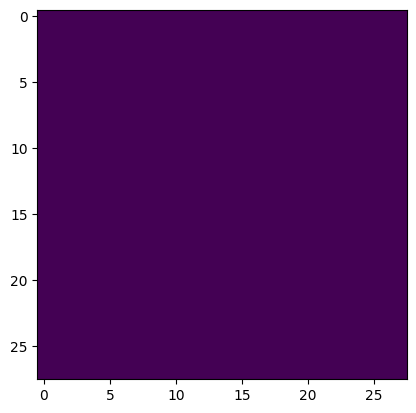

In [27]:
plt.imshow(training_pred[4]*255)